In [10]:
import numpy as np

In [11]:
import pandas as pd

In [12]:
import matplotlib.pyplot as plt

In [13]:
import time

In [14]:
import collections

In [15]:
import re

In [16]:
import random

In [17]:
import scipy.io

In [18]:
import glob

In [19]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer

In [20]:
from sklearn import preprocessing

In [21]:
from sklearn.svm import LinearSVC,SVC

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [23]:
from sklearn import metrics # additional sklearn function

In [24]:
from sklearn.model_selection import cross_val_score,GridSearchCV # performing grid search

In [25]:
from sklearn.feature_selection import SelectKBest

In [26]:
from sklearn.naive_bayes import BernoulliNB

In [27]:
from nltk import PorterStemmer # text processing

In [28]:
# import os
# folder_path = 'data/ham'
# for filename in glob.glob(os.path.join(folder_path,'*.txt')):
#     with open (filename, 'r') as rf:
#         n_contents = rf.read()
#         print(filename,'\n',n_contents,'\n','*'*50)

In [29]:
# with open("data/ham/0001.1999-12-10.farmer.ham.txt","r")as f:
#     n_contents = f.read()
#     print(filename,'\n',n_contents)

In [30]:
import pickle
pd.set_option('display.max_columns',None)

In [31]:
### Load the dictionary containing the dataset
pickle_in = open("data/Enron.pkl",'rb')
data_dict = pickle.load(pickle_in)

In [32]:
df = pd.DataFrame.from_dict(data_dict,orient='index')
df.replace('NaN',np.nan,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salary                     95 non-null     float64
 1   to_messages                86 non-null     float64
 2   deferral_payments          39 non-null     float64
 3   total_payments             125 non-null    float64
 4   loan_advances              4 non-null      float64
 5   bonus                      82 non-null     float64
 6   email_address              111 non-null    object 
 7   restricted_stock_deferred  18 non-null     float64
 8   deferred_income            49 non-null     float64
 9   total_stock_value          126 non-null    float64
 10  expenses                   95 non-null     float64
 11  from_poi_to_this_person    86 non-null     float64
 12  exercised_stock_options    102 non-null    float64
 13  from_messages              86 non-

In [33]:
df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788.0,807.0,NaN,1061827.0,NaN,600000.0,mark.metts@enron.com,NaN,NaN,585062.0,94299.0,38.0,NaN,29.0,1740.0,1.0,False,NaN,702.0,585062.0,NaN
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,NaN,1200000.0,NaN,NaN,-1386055.0,10623258.0,11200.0,NaN,6680544.0,NaN,2660303.0,NaN,False,1586055.0,NaN,3942714.0,NaN
ELLIOTT STEVEN,170941.0,NaN,NaN,211725.0,NaN,350000.0,steven.elliott@enron.com,NaN,-400729.0,6678735.0,78552.0,NaN,4890344.0,NaN,12961.0,NaN,False,NaN,NaN,1788391.0,NaN
CORDES WILLIAM R,NaN,764.0,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185.0,NaN,10.0,651850.0,12.0,NaN,0.0,False,NaN,58.0,386335.0,NaN
HANNON KEVIN P,243293.0,1045.0,NaN,288682.0,NaN,1500000.0,kevin.hannon@enron.com,NaN,-3117011.0,6391065.0,34039.0,32.0,5538001.0,32.0,11350.0,21.0,True,1617011.0,1035.0,853064.0,NaN


In [34]:
df.tail()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
GRAMM WENDY L,NaN,NaN,NaN,119292.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,119292.0
CAUSEY RICHARD A,415189.0,1892.0,NaN,1868758.0,NaN,1000000.0,richard.causey@enron.com,NaN,-235000.0,2502063.0,30674.0,58.0,NaN,49.0,307895.0,12.0,True,350000.0,1585.0,2502063.0,NaN
TAYLOR MITCHELL S,265214.0,533.0,227449.0,1092663.0,NaN,600000.0,mitchell.taylor@enron.com,NaN,NaN,3745048.0,NaN,0.0,3181250.0,29.0,NaN,0.0,False,NaN,300.0,563798.0,NaN
DONAHUE JR JEFFREY M,278601.0,865.0,NaN,875760.0,NaN,800000.0,jeff.donahue@enron.com,NaN,-300000.0,1080988.0,96268.0,188.0,765920.0,22.0,891.0,11.0,False,NaN,772.0,315068.0,NaN
GLISAN JR BEN F,274975.0,873.0,NaN,1272284.0,NaN,600000.0,ben.glisan@enron.com,NaN,NaN,778546.0,125978.0,52.0,384728.0,16.0,200308.0,6.0,True,71023.0,874.0,393818.0,NaN


In [35]:
df.isna().describe()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
top,False,False,True,False,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True
freq,95,86,107,125,142,82,111,128,97,126,95,86,102,86,93,86,146,80,86,110,129


In [36]:
df.isna().sum()

salary                        51
to_messages                   60
deferral_payments            107
total_payments                21
loan_advances                142
bonus                         64
email_address                 35
restricted_stock_deferred    128
deferred_income               97
total_stock_value             20
expenses                      51
from_poi_to_this_person       60
exercised_stock_options       44
from_messages                 60
other                         53
from_this_person_to_poi       60
poi                            0
long_term_incentive           80
shared_receipt_with_poi       60
restricted_stock              36
director_fees                129
dtype: int64

In [37]:
df.columns

Index(['salary', 'to_messages', 'deferral_payments', 'total_payments',
       'loan_advances', 'bonus', 'email_address', 'restricted_stock_deferred',
       'deferred_income', 'total_stock_value', 'expenses',
       'from_poi_to_this_person', 'exercised_stock_options', 'from_messages',
       'other', 'from_this_person_to_poi', 'poi', 'long_term_incentive',
       'shared_receipt_with_poi', 'restricted_stock', 'director_fees'],
      dtype='object')

In [38]:
len(df[df['poi']])

18

In [39]:
df.dtypes

salary                       float64
to_messages                  float64
deferral_payments            float64
total_payments               float64
loan_advances                float64
bonus                        float64
email_address                 object
restricted_stock_deferred    float64
deferred_income              float64
total_stock_value            float64
expenses                     float64
from_poi_to_this_person      float64
exercised_stock_options      float64
from_messages                float64
other                        float64
from_this_person_to_poi      float64
poi                             bool
long_term_incentive          float64
shared_receipt_with_poi      float64
restricted_stock             float64
director_fees                float64
dtype: object

In [40]:
df.shape

(146, 21)

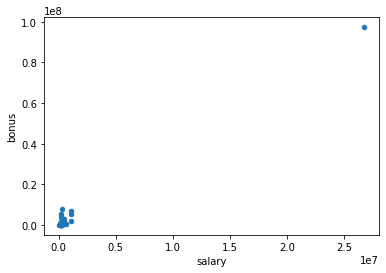

In [41]:
df.plot.scatter(x= 'salary' , y='bonus')

In [42]:
df['salary'].idxmax()

'TOTAL'

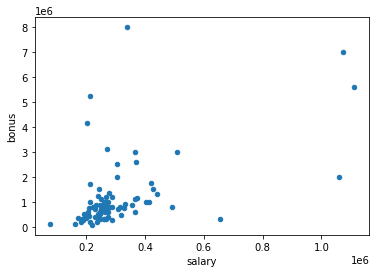

In [43]:
df.drop('TOTAL',inplace=True)
df.plot.scatter(x='salary',y='bonus')

In [44]:
df['fraction_from_poi']= df['from_poi_to_this_person'] / df['to_messages']
df['fraction_to_poi'] = df['from_this_person_to_poi'] / df['from_messages']

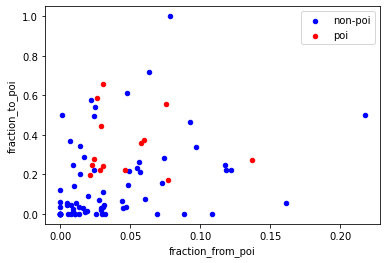

In [45]:
ax = df[df['poi']==False].plot.scatter(x='fraction_from_poi',y="fraction_to_poi",color='blue',label="non-poi")
df[df['poi']==True].plot.scatter(x='fraction_from_poi',y="fraction_to_poi",color='red',label='poi',ax=ax)

In above plot it is showing that poi and non poi data

In [46]:
df.columns

Index(['salary', 'to_messages', 'deferral_payments', 'total_payments',
       'loan_advances', 'bonus', 'email_address', 'restricted_stock_deferred',
       'deferred_income', 'total_stock_value', 'expenses',
       'from_poi_to_this_person', 'exercised_stock_options', 'from_messages',
       'other', 'from_this_person_to_poi', 'poi', 'long_term_incentive',
       'shared_receipt_with_poi', 'restricted_stock', 'director_fees',
       'fraction_from_poi', 'fraction_to_poi'],
      dtype='object')

In [47]:
features_list = ['poi', 'salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments',
                 'loan_advances', 'other', 'expenses', 'director_fees', 'total_payments', 
                 'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 
                 'total_stock_value', 'to_messages', 'from_messages', 'from_this_person_to_poi', 
                 'from_poi_to_this_person', 'shared_receipt_with_poi', 'fraction_from_poi', 'fraction_to_poi']

In [48]:
filled_df = df.fillna(value='NaN')
data_dict = filled_df.to_dict(orient='index')

In [49]:
my_dataset = data_dict

In [50]:
my_dataset.keys()

dict_keys(['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HAEDICKE MARK E', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'NOLES JAMES L', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY REX', 'LEMA

In [51]:
from feature_format import featureFormat,targetFeatureSplit
from tester import dump_classifier_and_data

In [52]:
data = featureFormat(my_dataset,features_list,sort_keys=True)
data

array([[0.00000000e+00, 2.01955000e+05, 4.17500000e+06, ...,
        1.40700000e+03, 1.61957271e-02, 2.96127563e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.77000000e+02, 0.00000000e+00, ...,
        4.65000000e+02, 6.89045936e-02, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.58403000e+05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [53]:
len(features_list)

22

In [54]:
y, X =targetFeatureSplit(data)

In [55]:
X = np.array(X)
y = np.array(y)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [51]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((108, 21), (36, 21), (108,), (36,))

## Logistic 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=1000)

In [ ]:
lr.fit(x_train,y_train)

In [ ]:
lr_yhat = lr.predict(x_test)
lr_yhat

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report,accuracy_score

In [ ]:
cm = confusion_matrix(y_test,lr_yhat)
cm

In [ ]:
print(classification_report(y_test,lr_yhat))

In [ ]:
plot_confusion_matrix(lr,x_test,lr_yhat)

In [ ]:
accuracy_score(y_test,lr_yhat)

## KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

In [ ]:
knn_yhat = knn.predict(x_test)
knn_yhat

In [ ]:
cm = confusion_matrix(y_test,knn_yhat)
cm

In [ ]:
print(classification_report(y_test,knn_yhat))

In [ ]:
plot_confusion_matrix(knn,x_test,knn_yhat)

## Support vector machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
svc_yhat  = model.predict(x_test)
svc_yhat

In [ ]:
cm = confusion_matrix(y_test,svc_yhat)
cm

In [ ]:
print(classification_report(y_test,svc_yhat))

In [ ]:
plot_confusion_matrix(model,x_test,svc_yhat)

## Navie Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB,CategoricalNB,GaussianNB,ComplementNB,MultinomialNB

### Bernoulli

In [ ]:
b = BernoulliNB()

In [ ]:
b.fit(x_train,y_train)

In [ ]:
b_yhat = b.predict(x_test)
b_yhat

In [ ]:
cm = confusion_matrix(y_test,b_yhat)
cm

In [ ]:
print(classification_report(y_test,b_yhat))

### Categorical 

In [ ]:
c = CategoricalNB()

In [ ]:
c.fit(x_train,y_train)

### Gaussian

In [ ]:
g= GaussianNB()

In [ ]:
g.fit(x_train,y_train)

In [ ]:
g_yhat = g.predict(x_test)
g_yhat

In [ ]:
cm = confusion_matrix(y_test,g_yhat)
cm

In [ ]:
print(classification_report(y_test,g_yhat))

### Multinominal

In [ ]:
m = MultinomialNB()

In [ ]:
m.fit(x_train,y_train)

### complement

In [ ]:
cb = ComplementNB()

In [ ]:
cb.fit(x_train,y_train)

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dtc = DecisionTreeClassifier()

In [60]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [61]:
dtc_yhat = dtc.predict(x_test)
dtc_yhat

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0.])

In [62]:
imp = dtc.feature_importances_
imp

array([0.0628882 , 0.28669796, 0.11005435, 0.04891304, 0.        ,
       0.        , 0.        , 0.20374322, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0909523 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.19675094])

In [63]:
import matplotlib.pyplot as plt

feature: 0 , score: 0.06289
feature: 1 , score: 0.28670
feature: 2 , score: 0.11005
feature: 3 , score: 0.04891
feature: 4 , score: 0.00000
feature: 5 , score: 0.00000
feature: 6 , score: 0.00000
feature: 7 , score: 0.20374
feature: 8 , score: 0.00000
feature: 9 , score: 0.00000
feature: 10 , score: 0.00000
feature: 11 , score: 0.00000
feature: 12 , score: 0.00000
feature: 13 , score: 0.09095
feature: 14 , score: 0.00000
feature: 15 , score: 0.00000
feature: 16 , score: 0.00000
feature: 17 , score: 0.00000
feature: 18 , score: 0.00000
feature: 19 , score: 0.00000
feature: 20 , score: 0.19675


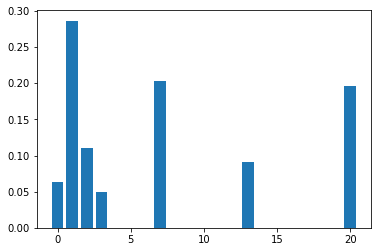

In [64]:
for i,v in enumerate(imp):
    print("feature: %.d , score: %.5f" % (i,v))
plt.bar([x for x in range(len(imp))],imp)
plt.show()

In [65]:
cm = confusion_matrix(y_test,dtc_yhat)
cm

array([[28,  6],
       [ 2,  0]], dtype=int64)

In [66]:
print(classification_report(y_test,dtc_yhat))

NameError: name 'classification_report' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score

In [67]:
from sklearn import tree

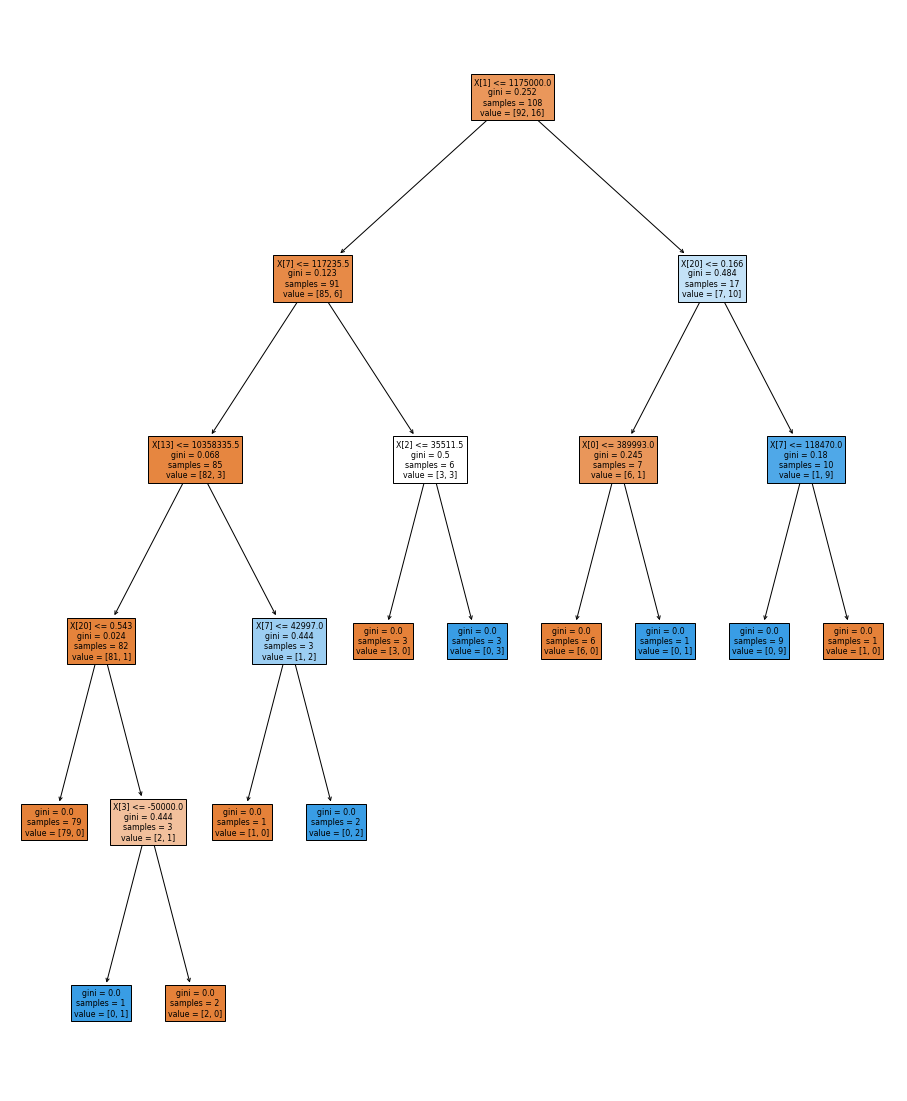

In [68]:
plt.figure(figsize=(16,20))
tree.plot_tree(dtc,filled=True)
plt.show()

In [69]:
pd.DataFrame({'Logistic regression':accuracy_score(y_test,lr_yhat),
             'Knn classifier':accuracy_score(y_test,knn_yhat),
             })

NameError: name 'lr_yhat' is not defined

### creating pipeline

In [52]:
from sklearn.model_selection import GridSearchCV,StratifiedShuffleSplit,cross_val_score
from sklearn.preprocessing import StandardScaler
sss = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)

SCALER = [None,StandardScaler()]
SELECTOR_K = [10,13,15,18,'all']
REDUCER__N_COMPONENTS = [2,4,6,8,10]

In [53]:
def evaluate_model(grid, X, y, cv):
    nested_score = cross_val_score(grid, X=X, y=y, cv=cv, n_jobs=-1)
    print("Nested f1 score: {}".format(nested_score.mean()))

    grid.fit(X, y)    
    print("Best parameters: {}".format(grid.best_params_))

    cv_accuracy = []
    cv_precision = []
    cv_recall = []
    cv_f1 = []
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        grid.best_estimator_.fit(X_train, y_train)
        pred = grid.best_estimator_.predict(X_test)

        cv_accuracy.append(accuracy_score(y_test, pred))
        cv_precision.append(precision_score(y_test, pred))
        cv_recall.append(recall_score(y_test, pred))
        cv_f1.append(f1_score(y_test, pred))

    print ("Mean Accuracy: {}".format(np.mean(cv_accuracy)))
    print ("Mean Precision: {}".format(np.mean(cv_precision)))
    print ("Mean Recall: {}".format(np.mean(cv_recall)))
    print ("Mean f1: {}".format(np.mean(cv_f1)))

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
# from sklearn.preprocessing import StandardScaler
pipe = Pipeline([('scaler',StandardScaler()),
                ('selector',SelectKBest()),
                ('reducer',PCA(random_state=42)),
                ('classifier',GaussianNB())
                ])

In [55]:
param_grid = {"scaler":SCALER,
             "selector__k":SELECTOR_K  , 
             'reducer__n_components': REDUCER__N_COMPONENTS}

In [56]:
gnb_grid  = GridSearchCV(pipe,param_grid,scoring='f1',cv=sss)
gnb_grid

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x0000021B894FAEE8>)),
                                       ('reducer',
                                        PCA(copy=True, iterated_power='auto',
                                            n_c...
                                            whiten=False)),
                                       ('classifier',
                                       

In [57]:
evaluate_model(gnb_grid,X,y,sss)

Nested f1 score: 0.366984126984127
Best parameters: {'reducer__n_components': 6, 'scaler': None, 'selector__k': 15}
Mean Accuracy: 0.8793103448275861
Mean Precision: 0.5433333333333333
Mean Recall: 0.325
Mean f1: 0.38


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
kbest = gnb_grid.best_estimator_.named_steps['selector']

In [59]:
features_array = np.array(features_list)
features_array = np.delete(features_array,8)
indices = np.argsort(kbest.scores_)[::-1]
k_features = kbest.get_support().sum()

In [60]:
features = []
for i in range(k_features):
    features.append(features_array[indices[i]])

features = features[::-1]
scores = kbest.scores_[indices[range(k_features)]][::-1]

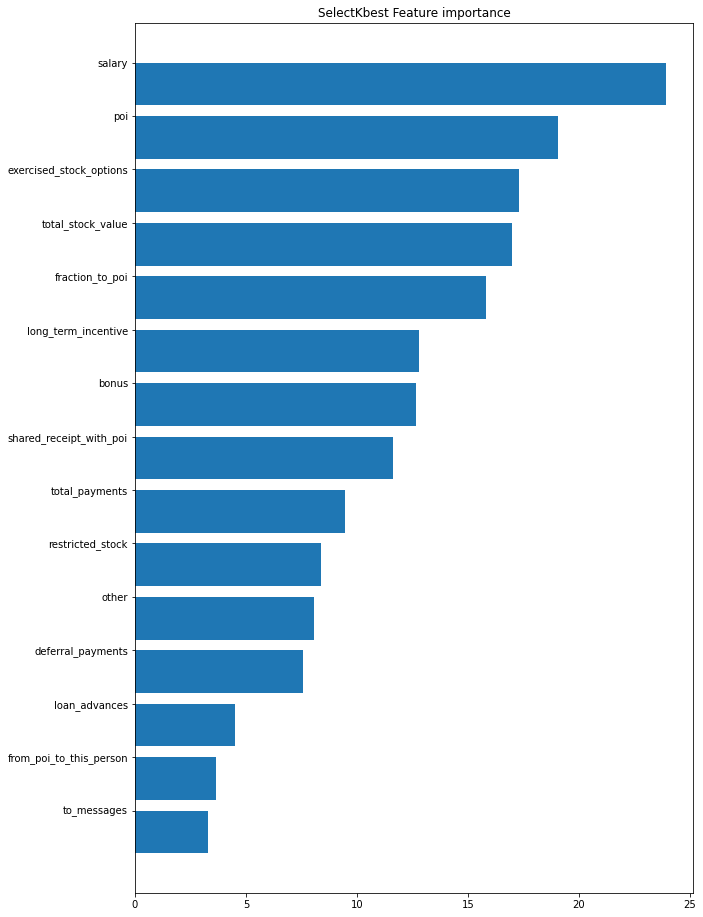

In [61]:
plt.figure(figsize=(10,16))
plt.barh(range(k_features),scores)
plt.yticks(np.arange(0.4,k_features),features)
plt.title('SelectKbest Feature importance')
plt.show()

### Applying SVM for pipeline

In [62]:
from sklearn.svm import SVC

In [65]:
pipe_1 = Pipeline([('scaler',StandardScaler()),
                ('selector',SelectKBest()),
                ('reducer',PCA(random_state=42)),
                ('classifier',SVC())
                ])

In [66]:
svm_grid  = GridSearchCV(pipe_1,param_grid,scoring='f1',cv=sss)
svm_grid

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x0000021B894FAEE8>)),
                                       ('reducer',
                                        PCA(copy=True, iterated_power='auto',
                                            n_c...
                                            probability=False,
                                            random_state=None, shrinking=True,
           

In [67]:
evaluate_model(svm_grid,X,y,sss)

Nested f1 score: 0.11333333333333333
Best parameters: {'reducer__n_components': 2, 'scaler': None, 'selector__k': 10}
Mean Accuracy: 0.8689655172413794
Mean Precision: 0.25
Mean Recall: 0.075
Mean f1: 0.11333333333333333


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lenovo\appdata\loca

In [69]:
k_best = svm_grid.best_estimator_.named_steps['selector']

In [104]:
features_array = np.array(features_list)
features_array = np.delete(features_array,8)
indices = np.argsort(k_best.scores_)[::-1]
k_features = k_best.get_support().sum()

In [106]:
np.delete(features_array,8)

array(['poi', 'salary', 'bonus', 'long_term_incentive', 'deferred_income',
       'deferral_payments', 'loan_advances', 'other', 'total_payments',
       'exercised_stock_options', 'restricted_stock',
       'restricted_stock_deferred', 'total_stock_value', 'to_messages',
       'from_messages', 'from_this_person_to_poi',
       'from_poi_to_this_person', 'shared_receipt_with_poi',
       'fraction_from_poi', 'fraction_to_poi'], dtype='<U25')

In [105]:
features_array

array(['poi', 'salary', 'bonus', 'long_term_incentive', 'deferred_income',
       'deferral_payments', 'loan_advances', 'other', 'director_fees',
       'total_payments', 'exercised_stock_options', 'restricted_stock',
       'restricted_stock_deferred', 'total_stock_value', 'to_messages',
       'from_messages', 'from_this_person_to_poi',
       'from_poi_to_this_person', 'shared_receipt_with_poi',
       'fraction_from_poi', 'fraction_to_poi'], dtype='<U25')

In [91]:
k_features

10

In [78]:
indices

array([ 1,  0, 10, 13, 20,  3,  2, 18,  9, 11,  7,  5,  6, 17, 14, 16, 19,
        8, 15, 12,  4], dtype=int64)

In [71]:
features = []
for i in range(k_features):
    features.append(features_array[indices[i]])

features = features[::-1]
scores = k_best.scores_[indices[range(k_features)]][::-1]

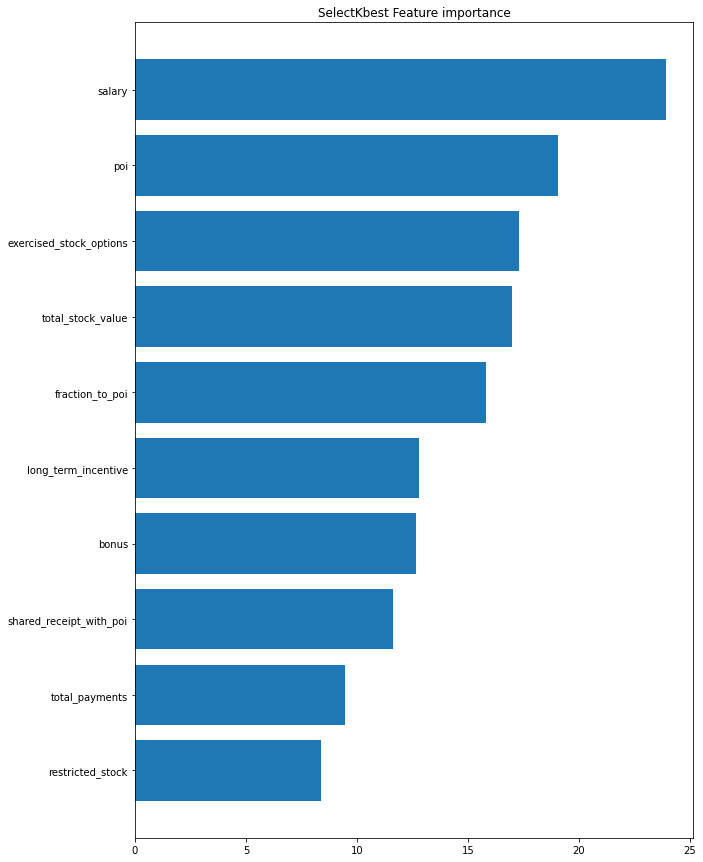

In [103]:
plt.figure(figsize=(10,15))
plt.barh(range(k_features),scores)
plt.yticks(np.arange(k_features),features)
plt.title('SelectKbest Feature importance')
plt.show()